Create a function that reverses a string. For example, given the string "forward", your function should return "drawrof". Assume all inputs are strings.

In [24]:
def reverse(str):
    reversed = []
    new_str = ''
    for i in str:
        reversed.append(i)
    reversed.reverse()
    for i in reversed:
        new_str += i
    return new_str

reverse('This creature softened my heart of stone. She died and with her died my last warm feelings for humanity.')

'.ytinamuh rof sgnileef mraw tsal ym deid reh htiw dna deid ehS .enots fo traeh ym denetfos erutaerc sihT'

Complete the function below that can be used to calculate and return the posterior probability of an event A, given the known outcome of Event B using Bayes Theorem:

In [29]:

def bayes(a, b_given_a, b_given_not_a):

    """
    Calculates P(A | B) using bayes theorem.

    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

    Returns:
        P(A | B)
    """ 
    
    prob_a_given_b = (b_given_a * a) / ((a * b_given_a) + ((1 - a) * b_given_not_a))
    
    return prob_a_given_b
 

Analyze the teams dataset from the Lahman baseball records. This dataset contains season statistics for each Major League Baseball team.
(https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv)

1. For all records since 1995, plot histograms for the following variables. Which distribution do they appear to follow? Consider what each variable is measuring along with the histogram's shape.

    - Stolen bases per game
    - Wins
    - Earned run average


2. Conduct some further exploratory data analysis on this dataset. Consider qualities like distributions, correlations and trends over time. Try to find something interesting to say about the data, and use visualizations to support your argument.


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
mlb_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv')
mlb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2805 non-null   int64  
 1   lgID            2755 non-null   object 
 2   teamID          2805 non-null   object 
 3   franchID        2805 non-null   object 
 4   divID           1288 non-null   object 
 5   Rank            2805 non-null   int64  
 6   G               2805 non-null   int64  
 7   Ghome           2406 non-null   float64
 8   W               2805 non-null   int64  
 9   L               2805 non-null   int64  
 10  DivWin          1260 non-null   object 
 11  WCWin           624 non-null    object 
 12  LgWin           2777 non-null   object 
 13  WSWin           2448 non-null   object 
 14  R               2805 non-null   int64  
 15  AB              2805 non-null   int64  
 16  H               2805 non-null   int64  
 17  2B              2805 non-null   i

In [53]:
# Extract coulmns of interest since 1995
bools = (mlb_data['yearID'] >= 1995)
updated_mlb_data = mlb_data.iloc[bools.values]
updated_mlb_data['SB']

2181     73.0
2182     92.0
2183     99.0
2184     58.0
2185    110.0
        ...  
2800     59.0
2801     93.0
2802    132.0
2803     82.0
2804     97.0
Name: SB, Length: 624, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd89c3b290>]],
      dtype=object)

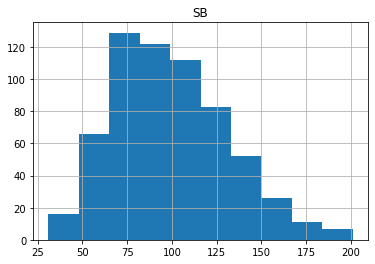

In [54]:
updated_mlb_data.hist('SB')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd866e7a10>]],
      dtype=object)

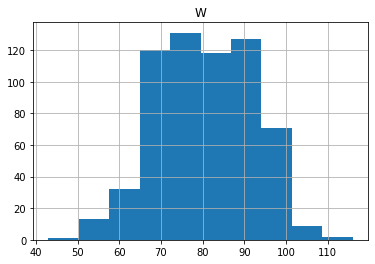

In [55]:
updated_mlb_data.hist('W')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd8f78e490>]],
      dtype=object)

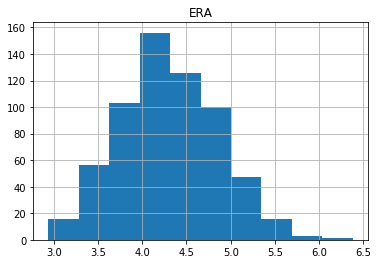

In [60]:
updated_mlb_data.hist('ERA')

##### All 3 distributions are fairly normal although not perfectly. For SB, the data is skewed slightly to the right.  Lets see if there are any correlations between the values.

In [61]:
updated_mlb_data['W'].corr(updated_mlb_data['SB'])

-0.020265984048155827

In [62]:
updated_mlb_data['W'].corr(updated_mlb_data['ERA'])

-0.5984547630878911

In [63]:
updated_mlb_data['ERA'].corr(updated_mlb_data['SB'])

-0.020265984048155827

There is a strong negative correlation between Wins and Earned Runs Average. This makes sense - a team's win percentage would likely go down as they number of runs they allow goes up. Stealing bases seems to have no correlation on ERA or win percentage. It is a pretty small part of the game so I was not expecting much of an impact.

### Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations each time. Plot the frequencies of the sample means. What distribution does this appear to follow?

In [80]:
from scipy import stats
from numpy import mean, std

In [71]:
win_means = []

for trial in range(1000):
    win_means.append(updated_mlb_data['W'].sample(n=100).mean())


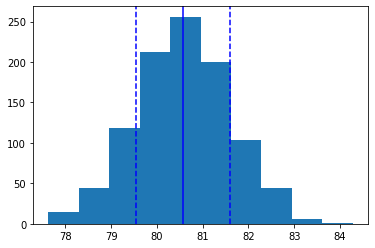

In [82]:
plt.hist(win_means)
plt.axvline(mean(win_means), color='b')
plt.axvline(mean(win_means) + std(win_means), color='b', linestyle='dashed')
plt.axvline(mean(win_means) - std(win_means), color='b', linestyle='dashed')
plt.show()

In [73]:
print(stats.describe(win_means))

DescribeResult(nobs=1000, minmax=(77.63, 84.28), mean=80.57139, variance=1.0743673352352352, skewness=0.018861665475569174, kurtosis=-0.055697234891538105)


In [83]:
sb_means = []

for trial in range(1000):
    sb_means.append(updated_mlb_data['SB'].sample(n=100).mean())


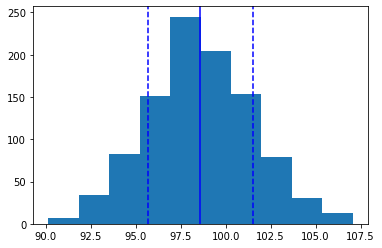

In [84]:
plt.hist(sb_means)
plt.axvline(mean(sb_means), color='b')
plt.axvline(mean(sb_means) + std(sb_means), color='b', linestyle='dashed')
plt.axvline(mean(sb_means) - std(sb_means), color='b', linestyle='dashed')
plt.show()

In [85]:
print(stats.describe(sb_means))

DescribeResult(nobs=1000, minmax=(90.15, 107.07), mean=98.5958, variance=8.57462118118118, skewness=0.07801235465180247, kurtosis=-0.16569471013544845)


Both distributions appear to be normal, as we would expect from the Central Limit Theorem 